# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [153]:
# Libraries for data loading, data manipulation and data visulisation
#Testing github
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for data preparation and model building
import warnings
warnings.filterwarnings("ignore")

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.correlation import plot_corr
from sklearn import metrics #RMSE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [154]:
df = pd.read_csv("df_train.csv"); # load the data
df.head() #Testing github

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


First things first, we had to load our train dataframe to be able to train our model(s), after loading we check a summary of what the dataframe consists of by using the .head() method and we can see after executing the cell that the dataframe has 49 columns.

We will later use other methods to analyse our data further.

In [155]:
df_test = pd.read_csv("df_test.csv")
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


Then we load our test dataframe which will help us in testing our model(s) and checked what data it consists of by using the .head() method also seeing that it consists of 48 columns.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


We begin by exploring the data by checking all columns for null values using a Pandas method.

In [161]:
# look at data statistics
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

It is now clear to see that the column 'Valencia_pressure' has a significant number of null values, **2,068 null values** to be exact out of 8763 rows.

In the cell below, the next step with regards to understanding the data is by using the 'describe' method to generate descriptive statistics which will provide insights regarding numerical columns.  This method shows us statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [162]:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


The shape method will show us the amounts of rows the dataset contains, as well as the number of columns.

After executing the cell we found that the train dataframe has 8763 rows and 49 columns.

In [163]:
#Checking Number of rows and coloumns
df.shape

(8763, 49)

The 'isnull()' method will be applied to confirm the number(sum) of null values in each column.  This analysis further confirms that the 'Valencia_pressure' column indeed contains 2068 null values.

In [164]:
#Check for Null Values
df.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

Further inspection of the "Valencia_pressure" column is done to analyze the values it containts.

In [165]:
#Valencia_pressure has 2068 NulLs
df.Valencia_pressure.describe()

count    8763.000000
mean     1012.051407
std         8.309001
min       972.666667
25%      1012.051407
50%      1013.000000
75%      1017.333333
max      1021.666667
Name: Valencia_pressure, dtype: float64

Skew will indicate how symmetrical your data is.  

The "skew" method used in the cell below indicates that the columns "Bilbao_weather_id", "Madrid_pressure", "Valencia_pressure", "Barcelona_weather_id", "Madrid_weather_id" have high negative skewness.  

Amongst other columns containing high positive skewness, "Bilbao_snow_3h", "Barcelona_pressure", "Seville_rain_3h", "Valencia_snow_3h" were found to have dramatically high double-digit values for skewness.

In [166]:
#feature distributions
#Check for symmetrical data\\Most of our data is fairly symmetrical and o High positive skew
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.950715
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

To measure the presence of outliers in the data, the uses "kurtosis" method.  A value below 3 indicates low kurtosis and thus indicates a lack of outliers

In [167]:
#Checking for Outliers// indicates we have many outliers in our data
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          3.821219
Seville_temp_max          -0

After executing our kurtosis method, we can identify our highest outliers being "Barcelona_rain_1h", "Seville_rain_1h", "Bilbao_snow_3h", "Barcelona_pressure", "Seville_rain_3h", "Madrid_rain_1h", "Baarcelona_rain_3h" and "Valencia_snow_3h".

----------------------------------------------------------------------------------------

### Data Visualisation

A boxplot will now be used to display the distribution of data in terms of the “minimum”, first quartile, median, third quartile, and the maximum.  This is commonly referred to as the "five number summary". The boxplot shows one the outliers in the data and what the outlier values are.

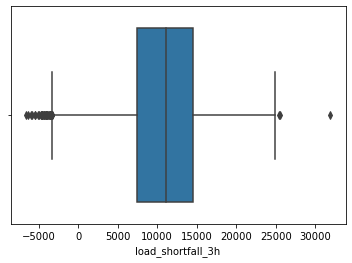

In [168]:
#Standardisation or normalisation can be applied to a feature to adjust the range
sns.boxplot(x='load_shortfall_3h', data=df);

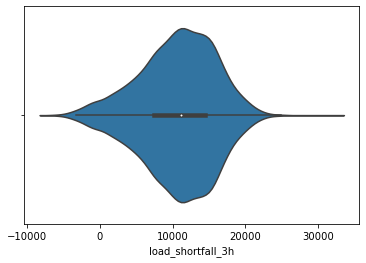

In [169]:
sns.violinplot(x='load_shortfall_3h', data=df);

The visualisations below helps to graphically communicate the skewness that was measured above in this notebook when the "skew()" method was used.

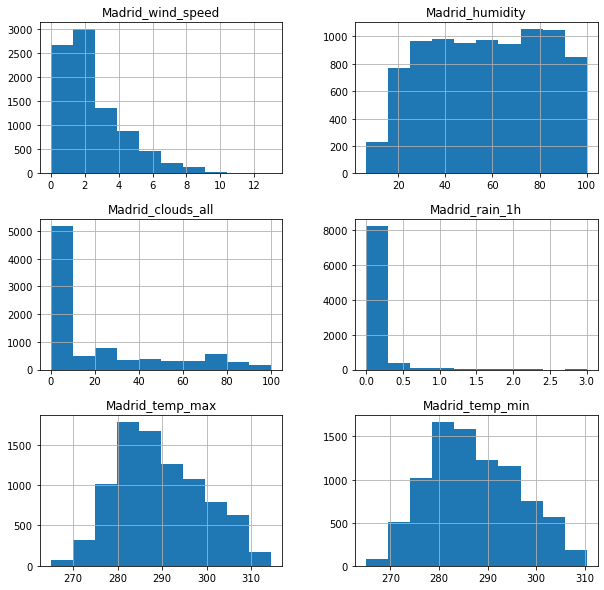

In [170]:
features = ['Madrid_wind_speed', 'Madrid_humidity', 'Madrid_clouds_all', 'Madrid_rain_1h','Madrid_temp_max','Madrid_temp_min'] # create a list of all numerical features
df[features].hist(figsize=(10,10));

### Analyzing correlation

In the next step of our exploratory data analysis, we analyze correlation between columns. The corr method is used to find the pairwise correlation of all columns. 

All non-numeric data columns in the Dataframe are ignore in this step.

Please take note that the correlation of a variable with itself is 1.

In [171]:
# evaluate correlation//determine correlation between features
df.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


"Madrid_temp_max" and "Valencia_temp_max" show high correlation for example which may partly be explained by the two cities closeness in distance as compared to Barcelona for example which is around 300 kilometers further from Madrid than Valencia is.

To see the level of correlation visually, a heatmap is used in the cell below to indicate correlation among variables.

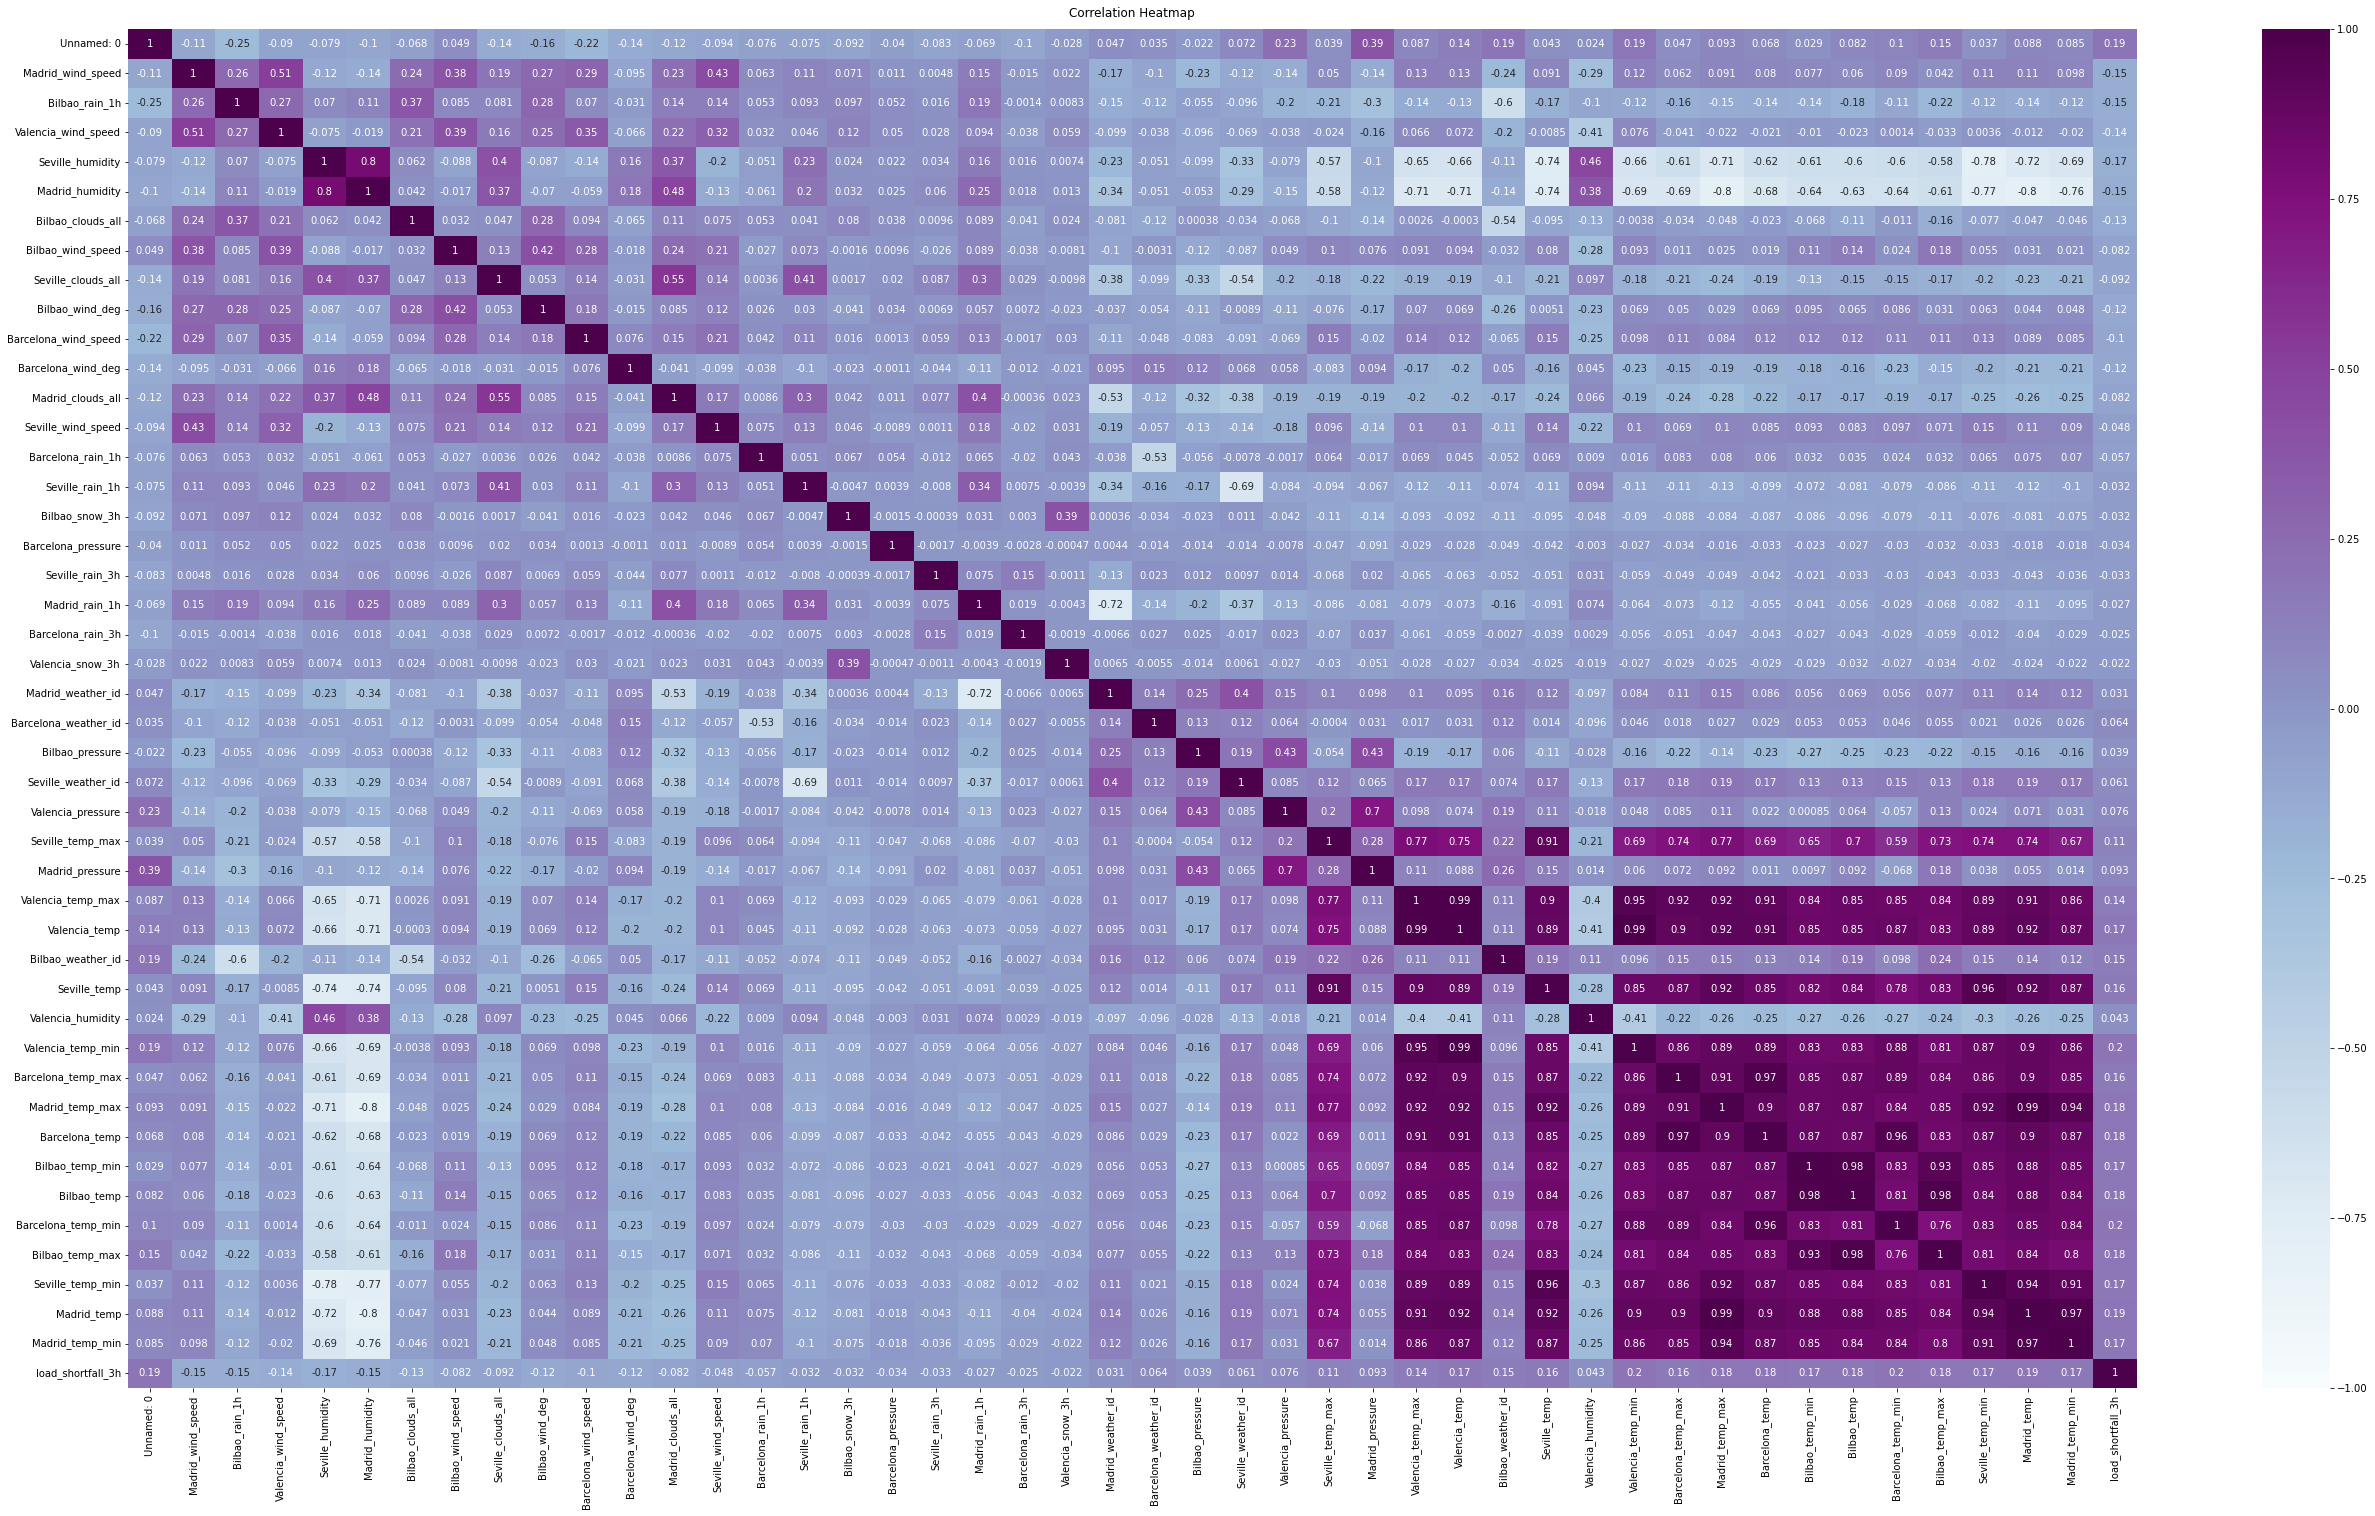

In [172]:
# evaluate correlation
plt.figure(figsize = (45, 25))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

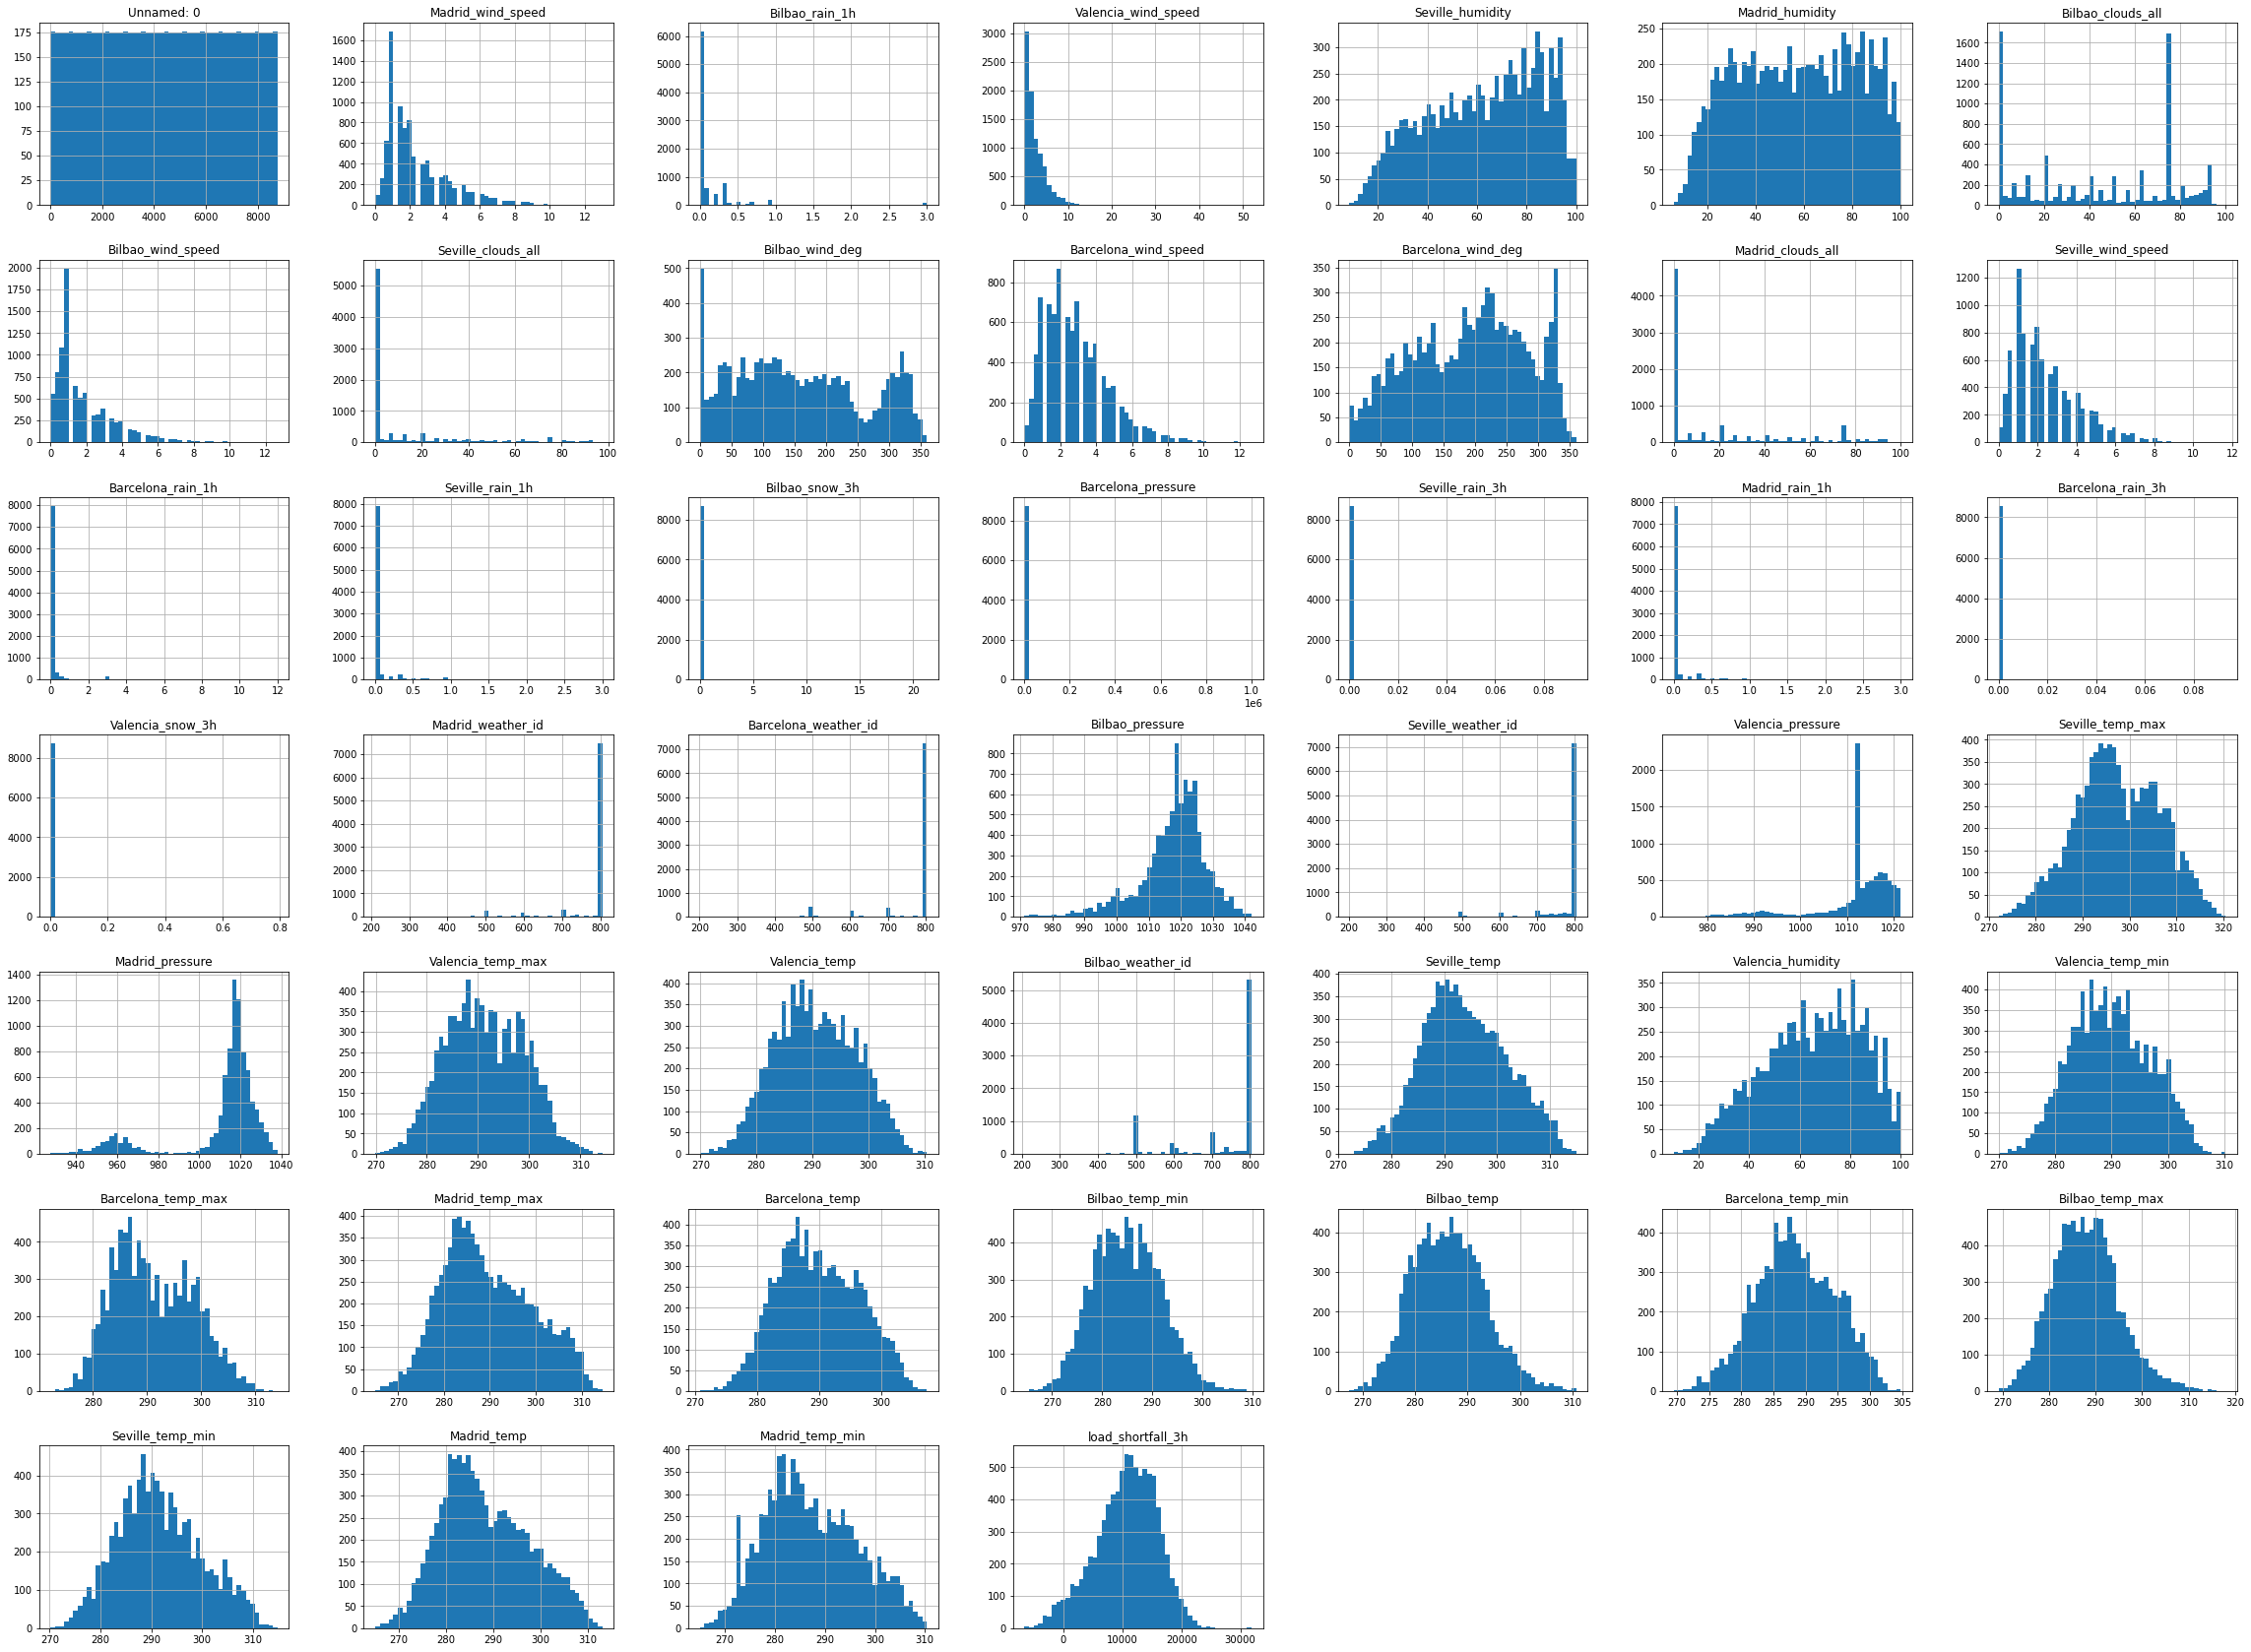

In [173]:
# have a look at feature distributions
df.hist(bins = 50, figsize = (40, 30), color = "tab:blue")
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

Analyzing the data has assisted in identifying data errors. The next step is to update, change, or remove data to correct certain issues with the data. By doing this, data quality is improved. Improves data quality helps provide more accurate, consistent and reliable information to use in the predictive models.

In the cell below, the 'Valencia_pressure' column's null values are updated and imputed with the mean of the column.

In [174]:
# remove missing values/ features??//Valencia_pressure 
#Populate null values of Valencia_pressure with mean 
df['Valencia_pressure']=df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean())

df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(df_test['Valencia_pressure'].mean())

In [175]:
#Run Test 
df['Valencia_pressure']

df_test['Valencia_pressure']

0       1013.148351
1       1013.148351
2       1013.148351
3       1013.148351
4       1013.148351
           ...     
2915    1013.148351
2916    1013.148351
2917    1013.148351
2918    1013.148351
2919    1013.148351
Name: Valencia_pressure, Length: 2920, dtype: float64

The "isnull" method is now used on the "Valencia_pressure" column to confirm that the mean values have been substituted in place of the null values.

In [176]:
df.Valencia_pressure.isnull().sum()

df_test.Valencia_pressure.isnull().sum()

0

Further analysis of the dataframe in the cell below shows the column that are "object" type.  This is an important step that may show the analysis team which columns may require their datatype to be changed in order o be useful for prediction.

In [177]:
# create new features
#Check data which is in Object datatype
df.select_dtypes(include=['object']).head(5)

df_test.select_dtypes(include=['object']).head(5)

,time,Valencia_wind_deg,Seville_pressure
0,2018-01-01 00:00:00,level_8,sp25
1,2018-01-01 03:00:00,level_8,sp25
2,2018-01-01 06:00:00,level_7,sp25
3,2018-01-01 09:00:00,level_7,sp25
4,2018-01-01 12:00:00,level_7,sp25


The "time" column contains valuable information that can be used later on.  Pandas is used in the cell below to change the datatype to numeric type within the dataframe.

In [178]:
# engineer existing features
#Change Objects to numeric,starting with time
df['time'] = pd.to_datetime(df['time'])

df_test['time'] = pd.to_datetime(df_test['time'])

The "Valencia_wind_deg" column also contains valuable ordinal data (statistical data that is categorical where the variables have ordered categories).

Python allows us to extract the relevant information (the digits, in this case) and by transforming the digits into a integer datatype, the data becomes useful for further use.

In [179]:
df['Valencia_wind_deg'].head(5)

0     level_5
1    level_10
2     level_9
3     level_8
4     level_7
Name: Valencia_wind_deg, dtype: object

In [180]:
#Remove 'level_' on Valencia_wind_deg and convert to numeric datatype0
df['Valencia_wind_deg'] =df['Valencia_wind_deg'].str.extract('(\d+)')
df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])

df_test['Valencia_wind_deg'] =df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])


Python also allows us to extract the relevant information from the "Seville_pressure" column and by transforming the digits into a integer datatype, the data becomes useful for further use, as can be seen below.

In [181]:
# Showing data for the Seville_pressure column which will be cleaned 
df['Seville_pressure'].head(5)

0    sp25
1    sp25
2    sp25
3    sp25
4    sp25
Name: Seville_pressure, dtype: object

In [182]:
#Remove 'sp' on Seville_pressure data. and convert it numeric
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)')
df['Seville_pressure'] = pd.to_numeric(df['Seville_pressure'])



In [183]:
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)')
df_test['Seville_pressure'] = pd.to_numeric(df_test['Seville_pressure'])

In [184]:
#Delete Markdown
df = df.drop('Unnamed: 0',axis = 1)

df_test = df_test.drop('Unnamed: 0',axis = 1)


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [185]:
# split data
X = df.drop(["load_shortfall_3h", "time"], axis = 1) #split the feature variable
y = df.iloc[:, -1] #split the response/target variable

In [186]:
#split data 
#y = df[:len(df_train)][["load_shortfall_3h"]]
#x = df[:len(df_train)].drop(["load_shortfall_3h"], axis = 1)

The above cell contains the features on which we will train our model(s) which is contained in the X variable and the response/target variable which we are trying to predict (load_shortfall_3h) in the y variable.

In [187]:
# create targets and features dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50) 

In [188]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

In our train-test function, we indicate the size of the test data we want to test with each iteration, which is typically a size of 0.2 (has to be between 0 and 1).

And the random state ensures that the test picks data randomly when the train-test function is carried out.

In [189]:
# create one or more ML models
# Linear regression model

lm = LinearRegression() #create the model
lm.fit(X_train, y_train) #train the model
predict = lm.predict(X_test) #predict on unseen data


In [190]:
# Ridge model

Ridge = Ridge() #create the model
Ridge.fit(X_train, y_train) #train model
R_pred = Ridge.predict(X_test) #predict on unseen data

In [191]:
#RandomForest model
R_F = RandomForestRegressor(n_estimators=100, random_state=5)
R_F.fit(X_train,y_train)
y_pred = R_F.predict(X_test)

In [207]:
# evaluate one or more ML models

print('Linear model train:', np.sqrt(metrics.mean_squared_error(y_train, lm.predict(X_train))))
print('Linear model test:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

print('Ridge model train:', np.sqrt(metrics.mean_squared_error(y_train, Ridge.predict(X_train))))
print('Ridge model test:', np.sqrt(metrics.mean_squared_error(y_test, R_pred)))

print('RandomForest model train:', np.sqrt(metrics.mean_squared_error(y_train, R_F.predict(X_train))))
print('RandomForest model test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('Decision Tree model train:', np.sqrt(metrics.mean_squared_error(y_train, regr_tree.predict(x_train))))
print('Decision Tree model test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Linear model train: 4814.484476617606
Linear model test: 5572.673579684345
Ridge model train: 4820.503607968404
Ridge model test: 5571.268138983247
RandomForest model train: 2457.181311028294
RandomForest model test: 11609.818533643163
Decision Tree model train: 11624.404740015365
Decision Tree model test: 11609.818533643163


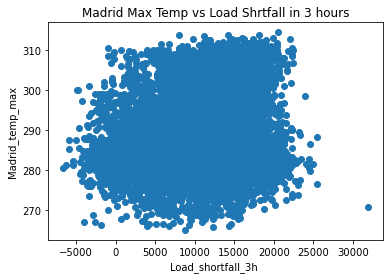

In [193]:
# evaluate one or more ML models
#Evaluating using Decision Tree, to find a better explanation of data
X = df["load_shortfall_3h"] # independent variable
y = df["Madrid_temp_max"] # dependent variable

plt.scatter(X,y) # create scatter plot
plt.title("Madrid Max Temp vs Load Shrtfall in 3 hours")
plt.xlabel("Load_shortfall_3h ")
plt.ylabel("Madrid_temp_max")
plt.show()

In [194]:
#Splitting our data to evaluate the performance of the model
x_train, x_test, y_train, y_test = train_test_split(X[:,np.newaxis],y,test_size=0.2,random_state=42)
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=2,random_state=42)
regr_tree.fit(x_train,y_train)
DecisionTreeRegressor(max_depth=2, random_state=42)

DecisionTreeRegressor(max_depth=2, random_state=42)

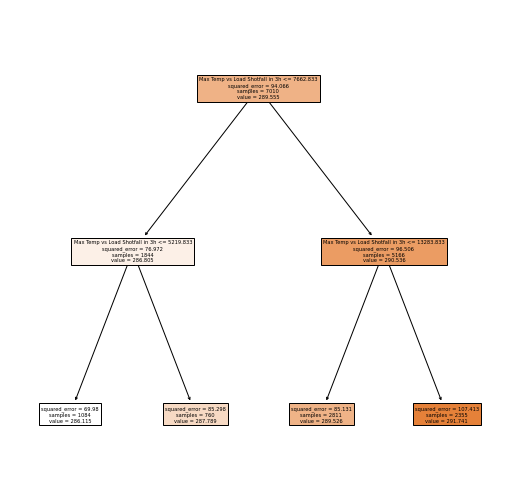

In [195]:
#Plot the Decision tree
plt.figure(figsize=(9,9))
_ = plot_tree(regr_tree, feature_names=['Max Temp vs Load Shotfall in 3h'],  filled=True)

In [196]:
#Evaluating Model Performance
# get predictions for test data
y_pred = regr_tree.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_pred,y_test)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE))

Regression Decision Tree model RMSE is: 9.794127934919228


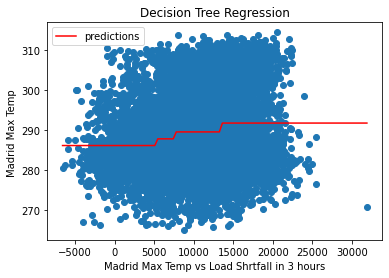

In [197]:
#Visualising Model Output
x_domain = np.linspace(min(X), max(X), 100)[:, np.newaxis]
# predict y for every point in x-domain
y_predictions = regr_tree.predict(x_domain)
# plot the regression tree line over data
plt.figure()
plt.scatter(X, y)
plt.plot(x_domain, y_predictions, color="red", label='predictions')
plt.xlabel("Madrid Max Temp vs Load Shrtfall in 3 hours")
plt.ylabel("Madrid Max Temp ")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [198]:
#MRL Model
# split predictors and response
X = df.drop(["load_shortfall_3h", "time"], axis = 1) #split the feature variable
y = df.iloc[:, -1] #split the response/target variable

lm = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [199]:
lm.fit(X_train, y_train)
# extract model intercept
beta_0 = float(lm.intercept_)
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print("Intercept is", beta_0)

Intercept is -35659.6329033031


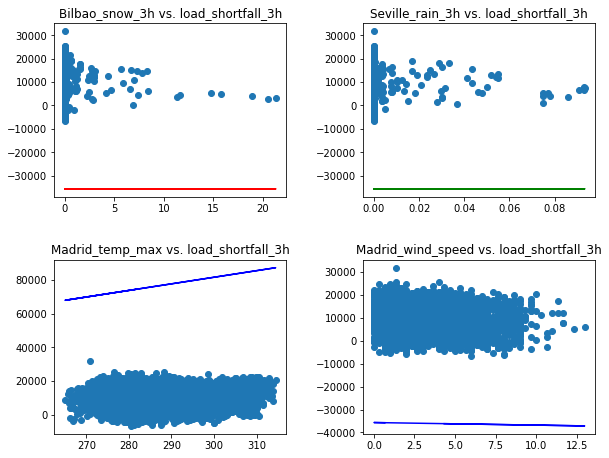

In [200]:
#Show Model
fig, axs = plt.subplots(2, 2, figsize=(9,7))

axs[0,0].scatter(df['Bilbao_snow_3h'], df["load_shortfall_3h"])
axs[0,0].plot(df['Bilbao_snow_3h'], lm.intercept_ + lm.coef_[18]*df['Bilbao_snow_3h'], color='red')
axs[0,0].title.set_text('Bilbao_snow_3h vs. load_shortfall_3h')

axs[0,1].scatter(df['Seville_rain_3h'], df["load_shortfall_3h"])
axs[0,1].plot(df['Seville_rain_3h'], lm.intercept_ + lm.coef_[20]*df['Seville_rain_3h'], color='green')
axs[0,1].title.set_text('Seville_rain_3h vs. load_shortfall_3h')

axs[1,0].scatter(df['Madrid_temp_max'], df["load_shortfall_3h"])
axs[1,0].plot(df['Madrid_temp_max'], lm.intercept_ + lm.coef_[38]*df['Madrid_temp_max'], color='blue')
axs[1,0].title.set_text('Madrid_temp_max vs. load_shortfall_3h')

axs[1,1].scatter(df['Madrid_wind_speed'], df["load_shortfall_3h"])
axs[1,1].plot(df['Madrid_wind_speed'], lm.intercept_ + lm.coef_[1]*df['Madrid_wind_speed'], color='blue')
axs[1,1].title.set_text('Madrid_wind_speed vs. load_shortfall_3h')

fig.tight_layout(pad=3.0)

plt.show()

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [208]:
# Compare model performance
print('Linear model train:', np.sqrt(metrics.mean_squared_error(y_train, lm.predict(X_train))))
print('Linear model test:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

print('Ridge model train:', np.sqrt(metrics.mean_squared_error(y_train, Ridge.predict(X_train))))
print('Ridge model test:', np.sqrt(metrics.mean_squared_error(y_test, R_pred)))

print('RandomForest model train:', np.sqrt(metrics.mean_squared_error(y_train, R_F.predict(X_train))))
print('RandomForest model test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('Decision Tree model train:', np.sqrt(metrics.mean_squared_error(y_train, regr_tree.predict(x_train))))
print('Decision Tree model test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Linear model train: 4814.484476617606
Linear model test: 5572.673579684345
Ridge model train: 4820.503607968404
Ridge model test: 5571.268138983247
RandomForest model train: 2457.181311028294
RandomForest model test: 11609.818533643163
Decision Tree model train: 11624.404740015365
Decision Tree model test: 11609.818533643163


In [203]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [204]:
# discuss chosen methods logic

<a id="seven"></a>
## API
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: API ⚡ |
| :--------------------------- |
| These are all the necessary steps we needed to create a working API |

---

In [ ]:


df['Valencia_pressure']=df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean())


In [ ]:
y = df["load_shortfall_3h"]
X = df[['Madrid_temp', 'Barcelona_temp_min', 'Bilbao_pressure', 'Seville_temp', 'Valencia_wind_speed']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=40)

In [ ]:
# define a model object
lr = LinearRegression()

# Train and test model
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [ ]:
import pickle

model_save_path = "linear_model.pkl"
with open( model_save_path,'wb') as file:
    pickle.dump(lm,file)